In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",64)
test_loader = test_loader("CIFAR10",64)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 64
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(64,0.5)
optimizer = "Adam"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,64,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS64-PD64-ADAM")

Epoch: 0, step: 50/781, loss: 4.834141254425049
Epoch: 0, step: 100/781, loss: 4.811586380004883
Epoch: 0, step: 150/781, loss: 4.675621509552002
Epoch: 0, step: 200/781, loss: 4.586302757263184
Epoch: 0, step: 250/781, loss: 4.631345748901367
Epoch: 0, step: 300/781, loss: 4.619251728057861
Epoch: 0, step: 350/781, loss: 4.526520252227783
Epoch: 0, step: 400/781, loss: 4.637335777282715
Epoch: 0, step: 450/781, loss: 4.542680263519287
Epoch: 0, step: 500/781, loss: 4.573253154754639
Epoch: 0, step: 550/781, loss: 4.447268486022949
Epoch: 0, step: 600/781, loss: 4.573183536529541
Epoch: 0, step: 650/781, loss: 4.587915420532227
Epoch: 0, step: 700/781, loss: 4.5519633293151855
Epoch: 0, step: 750/781, loss: 4.540665149688721
Epoch: 0 completed, average loss: 4.597070148140764, time taken: 1.036569599310557 mins
Epoch: 1, step: 50/781, loss: 4.436875343322754
Epoch: 1, step: 100/781, loss: 4.496497631072998
Epoch: 1, step: 150/781, loss: 4.463356971740723
Epoch: 1, step: 200/781, loss: 

Epoch: 9 completed, average loss: 3.691522207211288, time taken: 1.0235931277275085 mins
Epoch: 10, step: 50/781, loss: 3.5622811317443848
Epoch: 10, step: 100/781, loss: 3.791095495223999
Epoch: 10, step: 150/781, loss: 3.615941047668457
Epoch: 10, step: 200/781, loss: 3.6568706035614014
Epoch: 10, step: 250/781, loss: 3.645646095275879
Epoch: 10, step: 300/781, loss: 3.7033650875091553
Epoch: 10, step: 350/781, loss: 3.7037603855133057
Epoch: 10, step: 400/781, loss: 3.5136795043945312
Epoch: 10, step: 450/781, loss: 3.5766983032226562
Epoch: 10, step: 500/781, loss: 3.564378499984741
Epoch: 10, step: 550/781, loss: 3.666961431503296
Epoch: 10, step: 600/781, loss: 3.6896512508392334
Epoch: 10, step: 650/781, loss: 3.6651194095611572
Epoch: 10, step: 700/781, loss: 3.6781578063964844
Epoch: 10, step: 750/781, loss: 3.548041343688965
Epoch: 10 completed, average loss: 3.663228313382548, time taken: 1.0299129803975424 mins
Epoch: 11, step: 50/781, loss: 3.701643466949463
Epoch: 11, ste

Epoch: 19, step: 550/781, loss: 3.5743868350982666
Epoch: 19, step: 600/781, loss: 3.5412354469299316
Epoch: 19, step: 650/781, loss: 3.5543603897094727
Epoch: 19, step: 700/781, loss: 3.583045721054077
Epoch: 19, step: 750/781, loss: 3.473278760910034
Epoch: 19 completed, average loss: 3.5592361036855036, time taken: 1.02338045835495 mins
Epoch: 20, step: 50/781, loss: 3.5203375816345215
Epoch: 20, step: 100/781, loss: 3.586890459060669
Epoch: 20, step: 150/781, loss: 3.5820581912994385
Epoch: 20, step: 200/781, loss: 3.628211498260498
Epoch: 20, step: 250/781, loss: 3.50028395652771
Epoch: 20, step: 300/781, loss: 3.4959633350372314
Epoch: 20, step: 350/781, loss: 3.536872625350952
Epoch: 20, step: 400/781, loss: 3.5117881298065186
Epoch: 20, step: 450/781, loss: 3.6154110431671143
Epoch: 20, step: 500/781, loss: 3.4964935779571533
Epoch: 20, step: 550/781, loss: 3.493469476699829
Epoch: 20, step: 600/781, loss: 3.560422658920288
Epoch: 20, step: 650/781, loss: 3.6283648014068604
Epo

Epoch: 29, step: 300/781, loss: 3.4765264987945557
Epoch: 29, step: 350/781, loss: 3.4893717765808105
Epoch: 29, step: 400/781, loss: 3.597787618637085
Epoch: 29, step: 450/781, loss: 3.4970412254333496
Epoch: 29, step: 500/781, loss: 3.430447816848755
Epoch: 29, step: 550/781, loss: 3.569476366043091
Epoch: 29, step: 600/781, loss: 3.5073375701904297
Epoch: 29, step: 650/781, loss: 3.6629035472869873
Epoch: 29, step: 700/781, loss: 3.49766206741333
Epoch: 29, step: 750/781, loss: 3.5405938625335693
Epoch: 29 completed, average loss: 3.517423015550523, time taken: 1.0249536434809368 mins
Epoch: 30, step: 50/781, loss: 3.509965181350708
Epoch: 30, step: 100/781, loss: 3.4483203887939453
Epoch: 30, step: 150/781, loss: 3.373903274536133
Epoch: 30, step: 200/781, loss: 3.5378053188323975
Epoch: 30, step: 250/781, loss: 3.5444722175598145
Epoch: 30, step: 300/781, loss: 3.442141056060791
Epoch: 30, step: 350/781, loss: 3.476693868637085
Epoch: 30, step: 400/781, loss: 3.513396739959717
Epo

Epoch: 39, step: 50/781, loss: 3.3911826610565186
Epoch: 39, step: 100/781, loss: 3.4702255725860596
Epoch: 39, step: 150/781, loss: 3.546959161758423
Epoch: 39, step: 200/781, loss: 3.4877941608428955
Epoch: 39, step: 250/781, loss: 3.4941582679748535
Epoch: 39, step: 300/781, loss: 3.4405031204223633
Epoch: 39, step: 350/781, loss: 3.4849607944488525
Epoch: 39, step: 400/781, loss: 3.4705538749694824
Epoch: 39, step: 450/781, loss: 3.564516305923462
Epoch: 39, step: 500/781, loss: 3.439002513885498
Epoch: 39, step: 550/781, loss: 3.5037343502044678
Epoch: 39, step: 600/781, loss: 3.4866678714752197
Epoch: 39, step: 650/781, loss: 3.506988286972046
Epoch: 39, step: 700/781, loss: 3.5213677883148193
Epoch: 39, step: 750/781, loss: 3.4691057205200195
Epoch: 39 completed, average loss: 3.4805033558004186, time taken: 1.0246318618456522 mins
Epoch: 40, step: 50/781, loss: 3.4290506839752197
Epoch: 40, step: 100/781, loss: 3.561727523803711
Epoch: 40, step: 150/781, loss: 3.377786874771118

Epoch: 48, step: 650/781, loss: 3.3637189865112305
Epoch: 48, step: 700/781, loss: 3.40999174118042
Epoch: 48, step: 750/781, loss: 3.4158811569213867
Epoch: 48 completed, average loss: 3.4510707727009753, time taken: 1.0258894085884094 mins
Epoch: 49, step: 50/781, loss: 3.4506988525390625
Epoch: 49, step: 100/781, loss: 3.5203230381011963
Epoch: 49, step: 150/781, loss: 3.470825672149658
Epoch: 49, step: 200/781, loss: 3.3869740962982178
Epoch: 49, step: 250/781, loss: 3.515871286392212
Epoch: 49, step: 300/781, loss: 3.4543349742889404
Epoch: 49, step: 350/781, loss: 3.4392828941345215
Epoch: 49, step: 400/781, loss: 3.367774486541748
Epoch: 49, step: 450/781, loss: 3.4369401931762695
Epoch: 49, step: 500/781, loss: 3.487696409225464
Epoch: 49, step: 550/781, loss: 3.473614454269409
Epoch: 49, step: 600/781, loss: 3.486117124557495
Epoch: 49, step: 650/781, loss: 3.440985679626465
Epoch: 49, step: 700/781, loss: 3.5273542404174805
Epoch: 49, step: 750/781, loss: 3.410872220993042
Ep

Epoch: 58, step: 400/781, loss: 3.4314236640930176
Epoch: 58, step: 450/781, loss: 3.446683406829834
Epoch: 58, step: 500/781, loss: 3.461573600769043
Epoch: 58, step: 550/781, loss: 3.4542269706726074
Epoch: 58, step: 600/781, loss: 3.4865636825561523
Epoch: 58, step: 650/781, loss: 3.5610079765319824
Epoch: 58, step: 700/781, loss: 3.4374148845672607
Epoch: 58, step: 750/781, loss: 3.5148463249206543
Epoch: 58 completed, average loss: 3.4336553456383387, time taken: 1.0236443559328714 mins
Epoch: 59, step: 50/781, loss: 3.4860217571258545
Epoch: 59, step: 100/781, loss: 3.398263692855835
Epoch: 59, step: 150/781, loss: 3.464740514755249
Epoch: 59, step: 200/781, loss: 3.443650245666504
Epoch: 59, step: 250/781, loss: 3.4164764881134033
Epoch: 59, step: 300/781, loss: 3.440763235092163
Epoch: 59, step: 350/781, loss: 3.4406304359436035
Epoch: 59, step: 400/781, loss: 3.4322948455810547
Epoch: 59, step: 450/781, loss: 3.427043914794922
Epoch: 59, step: 500/781, loss: 3.3687636852264404

Epoch: 68, step: 150/781, loss: 3.4217262268066406
Epoch: 68, step: 200/781, loss: 3.4606521129608154
Epoch: 68, step: 250/781, loss: 3.517416000366211
Epoch: 68, step: 300/781, loss: 3.4012060165405273
Epoch: 68, step: 350/781, loss: 3.4539780616760254
Epoch: 68, step: 400/781, loss: 3.4936134815216064
Epoch: 68, step: 450/781, loss: 3.396193027496338
Epoch: 68, step: 500/781, loss: 3.3418221473693848
Epoch: 68, step: 550/781, loss: 3.4929111003875732
Epoch: 68, step: 600/781, loss: 3.4726345539093018
Epoch: 68, step: 650/781, loss: 3.426757335662842
Epoch: 68, step: 700/781, loss: 3.4368927478790283
Epoch: 68, step: 750/781, loss: 3.428722620010376
Epoch: 68 completed, average loss: 3.4179178444279903, time taken: 1.0247092962265014 mins
Epoch: 69, step: 50/781, loss: 3.408612012863159
Epoch: 69, step: 100/781, loss: 3.3178045749664307
Epoch: 69, step: 150/781, loss: 3.358441114425659
Epoch: 69, step: 200/781, loss: 3.454944610595703
Epoch: 69, step: 250/781, loss: 3.423192024230957


Epoch: 77, step: 750/781, loss: 3.321537971496582
Epoch: 77 completed, average loss: 3.4084588235838007, time taken: 1.0256918629010519 mins
Epoch: 78, step: 50/781, loss: 3.4908945560455322
Epoch: 78, step: 100/781, loss: 3.4238977432250977
Epoch: 78, step: 150/781, loss: 3.4115374088287354
Epoch: 78, step: 200/781, loss: 3.3766748905181885
Epoch: 78, step: 250/781, loss: 3.466263771057129
Epoch: 78, step: 300/781, loss: 3.45247220993042
Epoch: 78, step: 350/781, loss: 3.3875558376312256
Epoch: 78, step: 400/781, loss: 3.4662725925445557
Epoch: 78, step: 450/781, loss: 3.452470541000366
Epoch: 78, step: 500/781, loss: 3.3121025562286377
Epoch: 78, step: 550/781, loss: 3.345773935317993
Epoch: 78, step: 600/781, loss: 3.4033162593841553
Epoch: 78, step: 650/781, loss: 3.4158935546875
Epoch: 78, step: 700/781, loss: 3.3842644691467285
Epoch: 78, step: 750/781, loss: 3.412219524383545
Epoch: 78 completed, average loss: 3.4047924477068015, time taken: 1.0266369938850404 mins
Epoch: 79, st

Epoch: 87, step: 500/781, loss: 3.3912012577056885
Epoch: 87, step: 550/781, loss: 3.307603120803833
Epoch: 87, step: 600/781, loss: 3.2830700874328613
Epoch: 87, step: 650/781, loss: 3.3541581630706787
Epoch: 87, step: 700/781, loss: 3.3806798458099365
Epoch: 87, step: 750/781, loss: 3.4242265224456787
Epoch: 87 completed, average loss: 3.3923277192476005, time taken: 1.0237065235773721 mins
Epoch: 88, step: 50/781, loss: 3.487034559249878
Epoch: 88, step: 100/781, loss: 3.312086343765259
Epoch: 88, step: 150/781, loss: 3.412468671798706
Epoch: 88, step: 200/781, loss: 3.4794468879699707
Epoch: 88, step: 250/781, loss: 3.4505624771118164
Epoch: 88, step: 300/781, loss: 3.3735909461975098
Epoch: 88, step: 350/781, loss: 3.324409246444702
Epoch: 88, step: 400/781, loss: 3.397413730621338
Epoch: 88, step: 450/781, loss: 3.3338608741760254
Epoch: 88, step: 500/781, loss: 3.3809316158294678
Epoch: 88, step: 550/781, loss: 3.4961061477661133
Epoch: 88, step: 600/781, loss: 3.299400329589843

Epoch: 97, step: 250/781, loss: 3.4711356163024902
Epoch: 97, step: 300/781, loss: 3.3658246994018555
Epoch: 97, step: 350/781, loss: 3.3983044624328613
Epoch: 97, step: 400/781, loss: 3.368468999862671
Epoch: 97, step: 450/781, loss: 3.377271890640259
Epoch: 97, step: 500/781, loss: 3.339747428894043
Epoch: 97, step: 550/781, loss: 3.3548405170440674
Epoch: 97, step: 600/781, loss: 3.4529216289520264
Epoch: 97, step: 650/781, loss: 3.3576200008392334
Epoch: 97, step: 700/781, loss: 3.433046579360962
Epoch: 97, step: 750/781, loss: 3.3834424018859863
Epoch: 97 completed, average loss: 3.3806709128976937, time taken: 1.0244697332382202 mins
Epoch: 98, step: 50/781, loss: 3.353909969329834
Epoch: 98, step: 100/781, loss: 3.416985034942627
Epoch: 98, step: 150/781, loss: 3.2994253635406494
Epoch: 98, step: 200/781, loss: 3.4222612380981445
Epoch: 98, step: 250/781, loss: 3.413822889328003
Epoch: 98, step: 300/781, loss: 3.350680112838745
Epoch: 98, step: 350/781, loss: 3.450922966003418
E

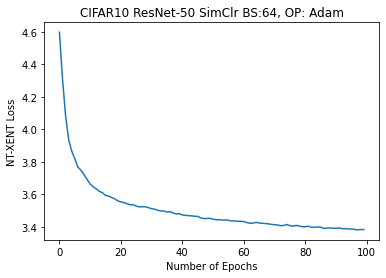

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:64, OP: Adam")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS64-PD64-ADAM.png")

In [7]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-SIMCLR-BS64-PD64-ADAM", "wb") as fp: 
    pickle.dump(train_loss, fp)